# 09 Terminal locations

The default location for the terminals is on the left for both postive and negative busbars. This can be changed with the `terminals` argument of the `setup_circuit` function.

In [1]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Lets explore the options and draw the circuits

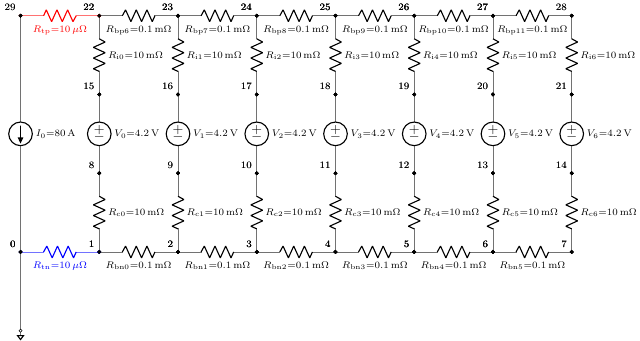

In [2]:
net_left = lp.setup_circuit(Np=7, Ns=1, terminals="left")
lp.draw_circuit(net_left, dpi=100)

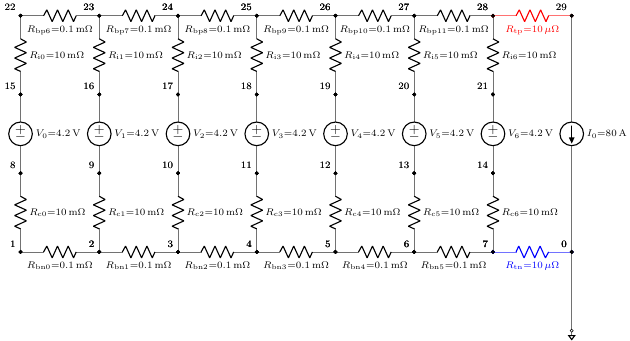

In [3]:
net_right = lp.setup_circuit(Np=7, Ns=1, terminals="right")
lp.draw_circuit(net_right, dpi=100)

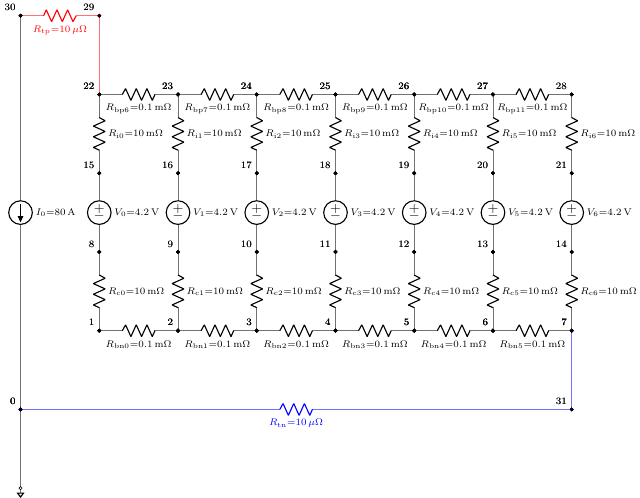

In [4]:
net_left_right = lp.setup_circuit(Np=7, Ns=1, terminals="left-right")
lp.draw_circuit(net_left_right, dpi=100)

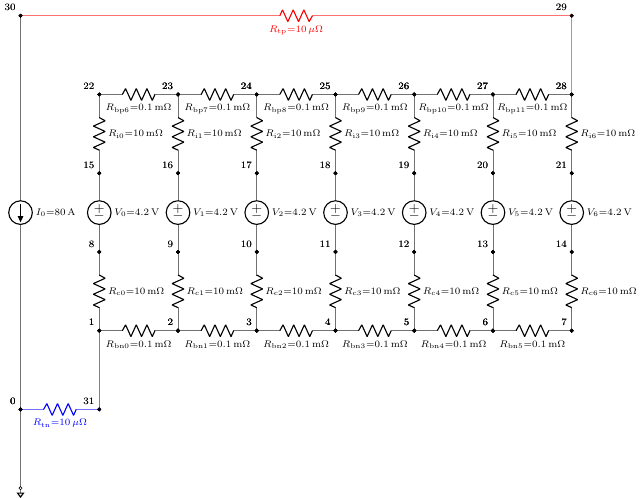

In [5]:
net_right_left = lp.setup_circuit(Np=7, Ns=1, terminals="right-left")
lp.draw_circuit(net_right_left, dpi=100)

Those were the text-based commands which are limited to connecting to the ends of the busbars. Connections to other nodes along the busbars are specified by relative node index `[Nbp, Nbn]` using a list or array specifying the node for the postive and negative connections respectively.

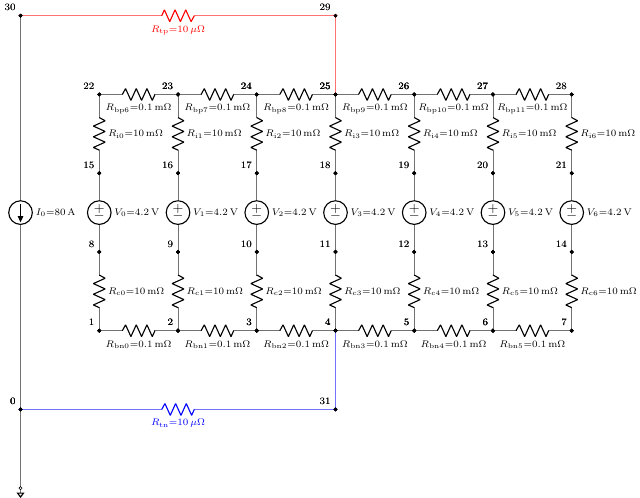

In [6]:
net_middle = lp.setup_circuit(Np=7, Ns=1, terminals=[3, 3])
lp.draw_circuit(net_middle, dpi=100)

The terminal locations have a rather stark impact on the current distribution in the pack as will now be demonstrated.

Stepping simulation: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 82.57it/s]


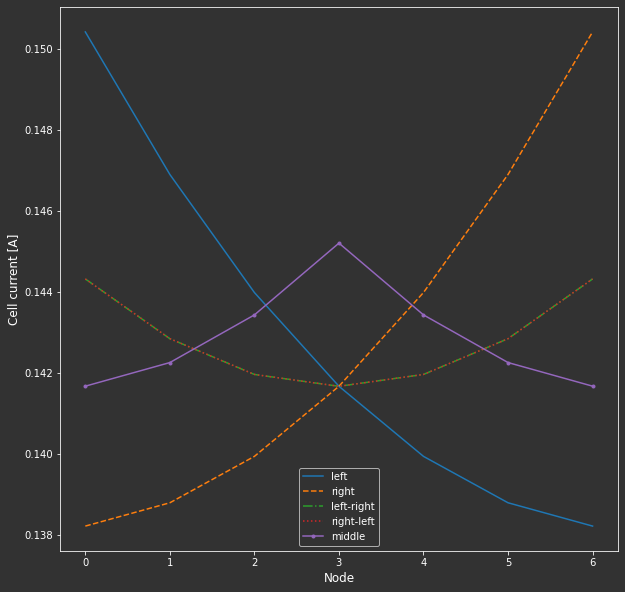

In [7]:
netlists = [net_left, net_right, net_left_right, net_right_left, net_middle]
labels = ["left", "right", "left-right", "right-left", "middle"]
lines = ["-", "--", "-.", ":", ".-"]
with plt.rc_context(lp.lp_context()):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for i, netlist in enumerate(netlists):
        param = pybamm.ParameterValues("Chen2020")
        experiment = pybamm.Experiment(
            [
                f"Discharge at 1 A for 1 minutes",
            ],
            period="10 seconds",
        )
        # Solve pack
        output = lp.solve(
            netlist=netlist,
            parameter_values=param,
            experiment=experiment,
            output_variables=None,
            initial_soc=0.5,
        )
        plt.plot(range(7), output["Cell current [A]"][-1, :], lines[i], label=labels[i])
    ax.set_xlabel("Node")
    ax.set_ylabel("Cell current [A]")
    plt.legend()
